### Group 92 Project Proposal
- Members: Alan, Bowen, Jia Yi, Kiki

### Which team will win the 22nd FIFA World Cup?

### Introduction

The FIFA World Cup is an international football competition held by the Fédération Internationale de Football Association (FIFA) once every four years. Contesting teams are made up of the senior men's national teams of countries that are FIFA members. This is the most prestigious and most widely viewed association football tournament in the world. 

The current competition structure starts with qualifying tournaments that are held within the 6 FIFA continental zones (Africa, Asia, North and Central America and Caribbean, South America, Oceania, and Europe) to pick the top 32 national teams. This is followed by a final tournament which includes a group stage and knockout stage. In the former, 32 teams compete within 8 groups of 4 in a round-robin format and the top 2 teams of each group advance to the knockout stage. In the latter, one-off matches are played through the quarter-finals, semi-fin

### Preliminary exploratory data analysis

In [1]:
library(tidyverse)

options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
#read data
heart <- read_csv("heart.csv")

#clean and wrangle data
heart <- heart |>
    mutate(target = as_factor(target))
    #select(age, trestbps, target)
heart

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
47,1,0,110,275,0,0,118,1,1.0,1,1,2,0


In [3]:
#data summarized in table, number of observations in each class of target
#0 meaning no heart disease, 1 meaning heart disease
summarize_heart <- heart |>
    group_by(target) |>
    summarize(n = n())
summarize_heart

target,n
<fct>,<int>
0,499
1,526


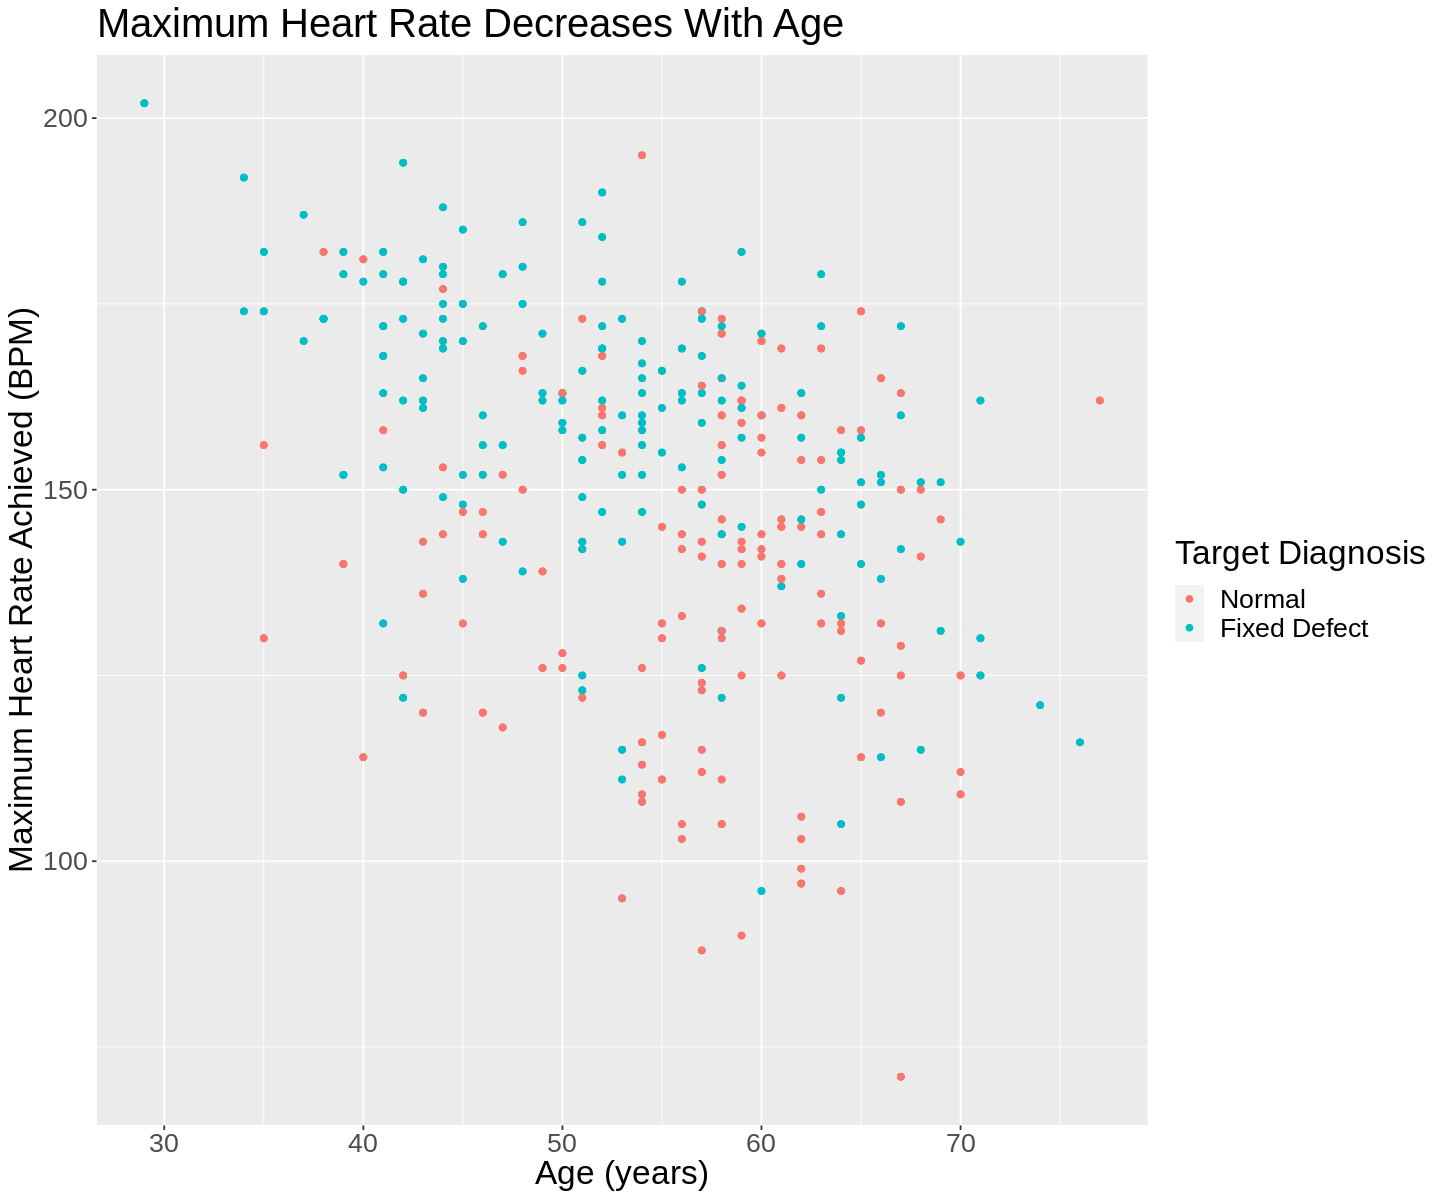

In [8]:
#visualize the data
#scatter plot of maximum heart rate against age, colour points by target diagnosis
options(repr.plot.width = 12, repr.plot.height = 10)

visualize_heart <- heart |>
    ggplot(aes(x = age, y = thalach, colour = target)) +
        geom_point() +
        labs(x = "Age (years)",
             y = "Maximum Heart Rate Achieved (BPM)",
             colour = "Target Diagnosis",
             title = "Maximum Heart Rate Decreases With Age") +
        scale_colour_discrete(labels = c("Normal", "Fixed Defect")) +
        theme(text = element_text(size = 20))
visualize_heart

### Methods

### Expected outcomes and significance

Heart disease patients need an immediate diagnosis, prompt treatment, and ongoing monitoring. Numerous data mining techniques have been applied in the past to diagnose and predict heart illnesses in order to meet their needs. Cardiovascular illness is frequently identified by doctors based on the results of recent clinical testing and their prior experience treating patients who presented with comparable symptoms. Our data model will attempt to simulate a similar role, in which two predictors are used to predict the likelihood of someone having heart disease. Furthermore, we are expecting to use a testing set to confirm the accuracy of our model. 
Limitations: Despite our data set having a handful of predictors that are numerical, we are using only 2 that we believe are the biggest predictors. The research can be potentially extended by testing multiple predictors to find which one has the biggest impact. This would justify the selection of our 2 predictors from a statistical perspective. Furthermore, there is the potential to use 3 predictors at the same time to make a 3d model. However this would be hard to implement with our group’‘s current knowledge and skills. 
